In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

# White Noise AutoRegressive (AR) Models
## White Noise
- Uncorrelated; No correlation between random variables
- $X_t = \alpha_t$
- Constant mean $ \mu_{\alpha}$ (usually 0); constant variance $\sigma_{alpha}^2$ (usually 1)
- Null covariance 
- The ACF and PACF of a WN are null for all $ k \ne 0$
- $ \epsilon_t$ ~ $WN (0, \sigma^2)$
- If its gaussian and uncorrelated then its independent $ \epsilon_t$ ~ $ii_n$
- Building blocks for Time Series, can build autoregressive processes
### Autoregressive Process
- $ X_t = \phi X_{t-1} + a_t$
- Regressing $X_t$ on $X_{t-1}$
- Auto because $X_t$ is dependant $X_{t-1}$
- 

Text(0.5, 1.0, 'Sample White Noise')

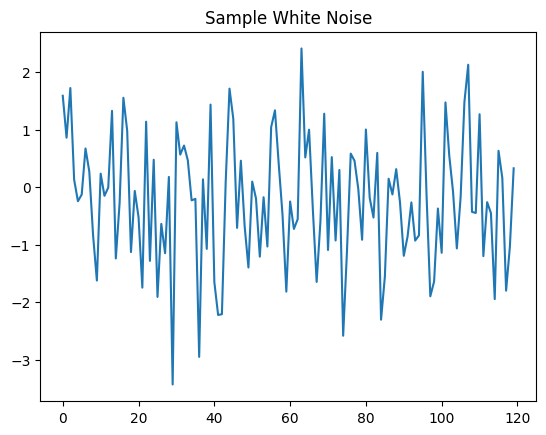

In [2]:
rando_ar = np.random.normal(0, 1, 120)
plt.plot(rando_ar)
plt.title('Sample White Noise')


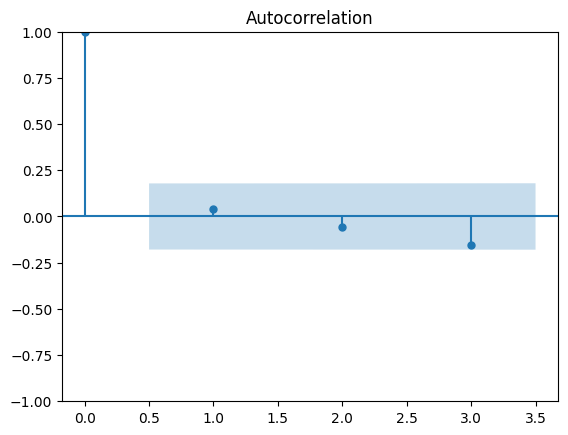

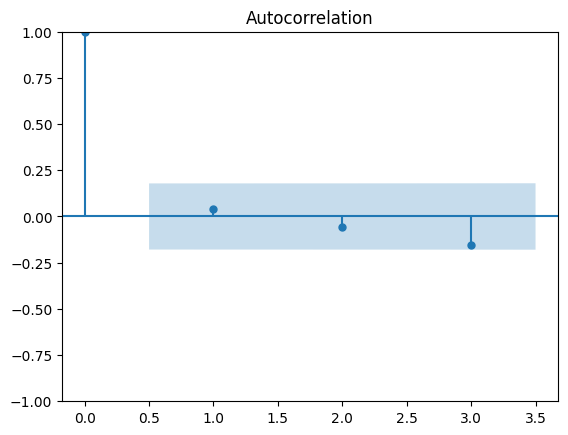

In [3]:
from statsmodels.graphics.tsaplots import plot_acf 
plot_acf(rando_ar, lags = 3)

In [4]:
a = rando_ar
b = rando_ar
for i in range(len(rando_ar[1:])):
    a[i] = a[i-1] * 0.9 + rando_ar[i]
for i in range(len(rando_ar[1:])):
    b[i] = b[i-1] * (-0.9) + rando_ar[i]


array([ 1.58828523,  1.12543169,  3.00954186,  1.04243889,  2.1937322 ,
        0.71683175,  2.44958681,  0.852587  ,  1.14936508, -0.93211084,
        1.16559489, -0.90517546,  0.93678756,  0.59305368, -0.4798492 ,
        0.20670161,  1.16485474,  1.15035641, -0.18443223,  0.86631865,
       -0.67144837, -1.04400617,  0.59408293, -2.12614774,  0.95788363,
       -3.62922018,  0.13758245, -4.08742209,  0.28948089, -6.73930714,
        1.36206297, -4.89282464,  1.82622778, -3.4960807 ,  1.25027156,
       -3.03511172, -1.93617921, -2.32205861, -2.64074782, -0.44613787,
       -3.78805328, -2.58219378, -5.27558595, -1.99696512, -2.56099418,
       -0.42720963, -2.78166628,  0.11379837, -2.93276501, -1.30399161,
       -2.27894762, -1.25336636, -3.05391487, -1.19002584, -3.50492585,
        0.08076793, -1.50436506,  0.46262537, -1.70308747, -1.44012675,
       -1.62806173, -1.89202869, -1.87397545,  0.87752557, -1.00174233,
        1.70952732, -1.19989311, -0.2611662 , -1.56863899,  1.06

Text(0.5, 1.0, 'AR Process')

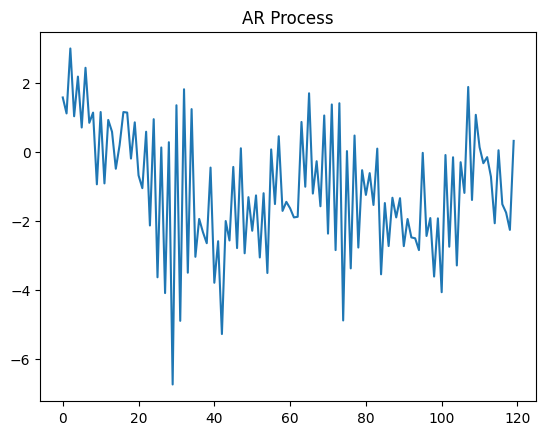

In [5]:
df = pd.DataFrame({
    'A-t' : rando_ar,
    'X_t' : a,
    'X_t_2' : b
})
plt.plot(df['X_t'])
plt.title('AR Process')

## AutoRegressive Representation
Two useful rep of stationary time series or stochastic process X_t
- $ X_t = \pi_1 X_{t-1} + \pi_2 X_{t-2}  + ... a_t$ 
- Or Equivalently :
  - $\pi(B)X_t = a_t$
  - Where $\pi (B) = 1 - \pi_1B - \pi_2B - ... = 1 - \sum_{j = 1}^{\infty}\pi_jB^j$
  - A process is said to be invertible if it can be written in the above form 
### AR(p) Model:
- Autoregresive model order p 
- $X_t = \phi X_{t-1} + ... \phi_p X_{t-p} + a_t$
- Where \epsilon_t is zero mean white noise series, process is always invertible 
#### AR(1) Model:
  - $X_t = \phi_1 X_{t-1} + a_t$
  - Where $a_t$ is a zero mean white noise series, because < infinity the process is invertible
  - To be stationary, the roots of ($1 - \phi B$) = 0 must be outside unit circle, because the root $B = \frac{1}{ \phi}$, for a stationary model we have $ |{\phi}| \lt 1$
  - ACF: 
    - Multiply both sides by X_{t-k}, we get: 
      - $E(X_{t-k} X_t) = \phi_1 E(X_{t-k}X_{t-1}) + E(X_{t-k} a_t)$
      -  = $ \gamma_k = \phi_1 ]gamma_{k-1}, k\ge 1$ 
      -  Divide by variance on both sides ($\gamma_0$)
      - = $\phi_k = \phi_1 \phi_{k-1} , k \ge 1$
      - If -1 < \phi_1 < 0 the ACF decays exponentially ro 0, but if 0 < \phi_1 < 1. the ACF decays in damped sine wave pattern to 0
      - The PACF exhibits a significant spike at alg 1 and then cuts off after lag 1
  

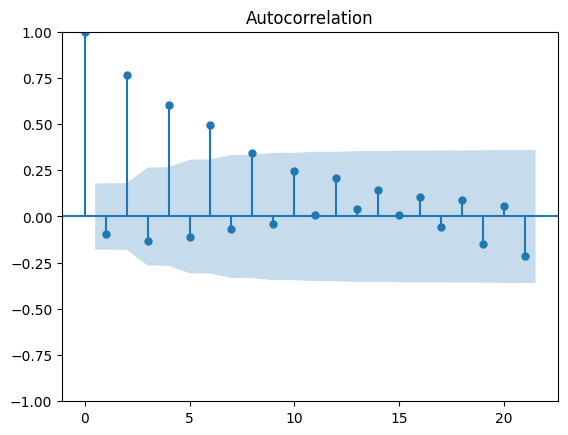

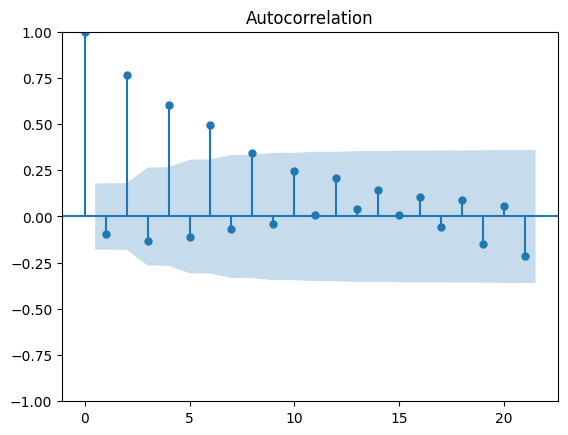

In [6]:
plot_acf(df['X_t'])

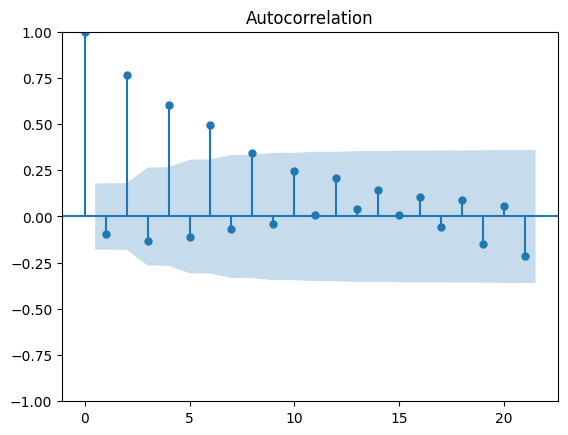

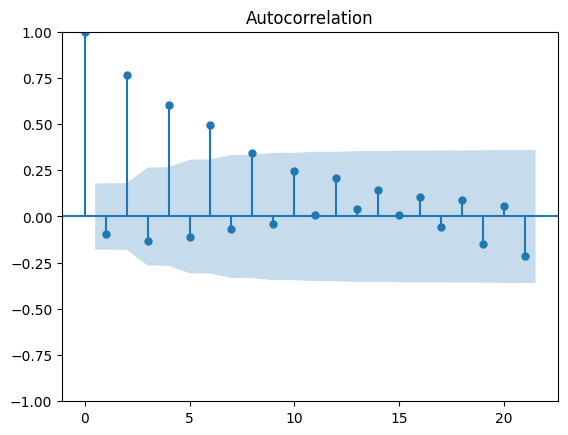

In [7]:
plot_acf(df['X_t_2'])

/opt/homebrew/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


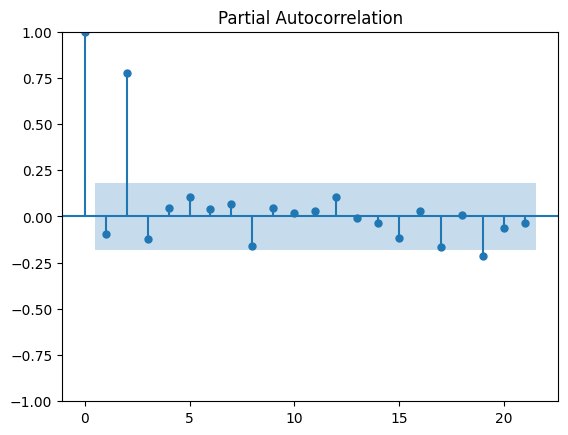

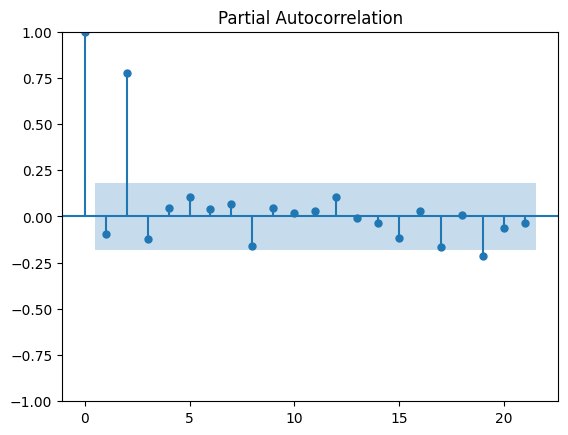

In [8]:
from statsmodels.graphics.tsaplots import plot_pacf 
plot_pacf(df['X_t'])

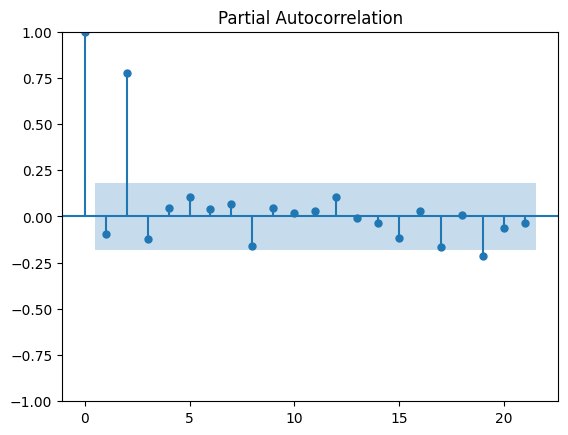

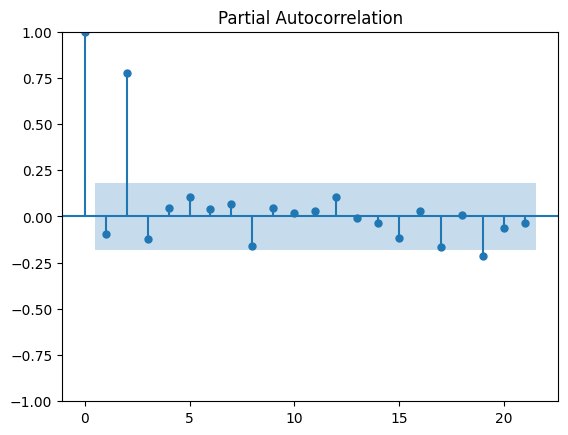

In [9]:
plot_pacf(df['X_t_2'])

#### AR(2) Model
- $X_t = \phi_1 X_{t-1} + \phi_2 X_{t-2} + a_t$ = $\phi_2(B)X_t = a_t$
- The roots have to be outside of the unit circle:
  - $\phi_1 + \phi_2 \lt 1, \phi_2 -\phi_1 \lt1, -1\lt \phi_2 \lt 1$
  - The ACF tails off as an exponential decay or a damped sine waves depending on roots of $\phi_2(B) = 0$ and the PACF cuts off after lag 2
**two sigma rule**
